# Ridge Algorithm

Ridge regression machine learning algorithm is most commonly used when the training data is limited.

In [9]:
import os
import numpy as np 
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [4]:
print(os.getcwd())
print("")

train = pd.read_csv("../data/train_after_feature_engineering.csv")
test = pd.read_csv("../data/test_after_feature_engineering.csv")

print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))    
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


/home/mcheruvu/notebook/code

The train data has 1460 rows and 307 columns
The test data has 1459 rows and 306 columns


In [5]:
np.random.seed(1234)

#found this best alpha value through cross-validation
_best_alpha = 0.00099

_ridge_algo = Ridge(alpha = _best_alpha, normalize = True)

# Fit the Model

In [6]:
target_vector = pd.DataFrame(index = train.index, columns=["SalePrice"])
target_vector["SalePrice"] = train["SalePrice"]
target_vector["SalePrice"] = np.log1p(target_vector["SalePrice"]) # log(SalePrice) + 1

train.drop(['SalePrice'], axis=1, inplace=True)

_ridge_algo.fit(train, target_vector)   

Ridge(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

# Feature Importance

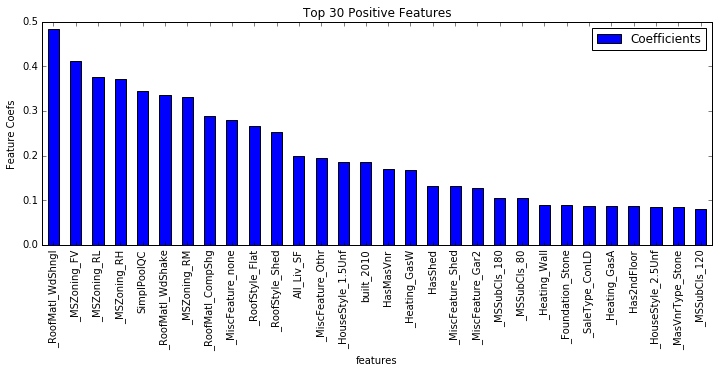

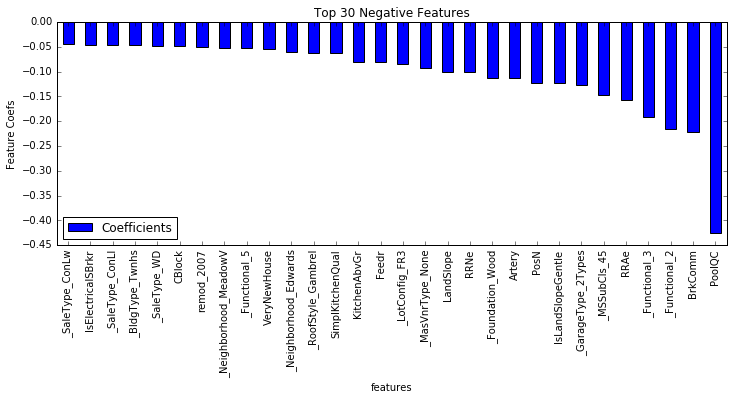

In [10]:
df = {'features': train.columns.values, 'Coefficients': _ridge_algo.coef_[0]}
coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
plt.figure()
coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
plt.ylabel('Feature Coefs')
plt.figure()
coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
plt.ylabel('Feature Coefs')

# Predict the Test Sale Price

In [13]:
y_train = target_vector
y_train_pred = _ridge_algo.predict(train)
    
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print("Ridge score on training set: ", rmse_train)

y_test_pred = _ridge_algo.predict(test)

# some how the ridge prediction output is giving array of one dimensional array
y_test_pred = np.concatenate(y_test_pred, axis=0) 

print(y_test_pred[5:])

('Ridge score on training set: ', 0.098889538170551794)
[ 12.07863303  12.0633717   11.99841596 ...,  12.03874229  11.67402135
  12.36761731]


# Save Predictions

In [14]:
df_predict = pd.DataFrame({'Id': test["Id"], 'SalePrice': np.exp(y_test_pred) - 1.0})
#df_predict = pd.DataFrame({'Id': id_vector, 'SalePrice': sale_price_vector})

df_predict.to_csv('../data/kaggle_python_ridge.csv', header=True, index=False)

print("...file saved")

...file saved
